In [3]:
# import libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the data
df = pd.read_csv('C:\Data Science\Technogeeks class notes of Data Sci\Data Science online course notes\DS projects\Credit card fraud Project Code by YT\data\creditcard.csv')
# df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#checking the class distrubtion of target variable/column
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

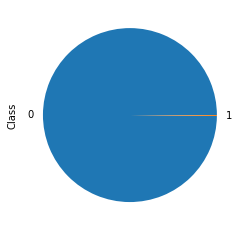

In [9]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

In [10]:
#checking corelation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


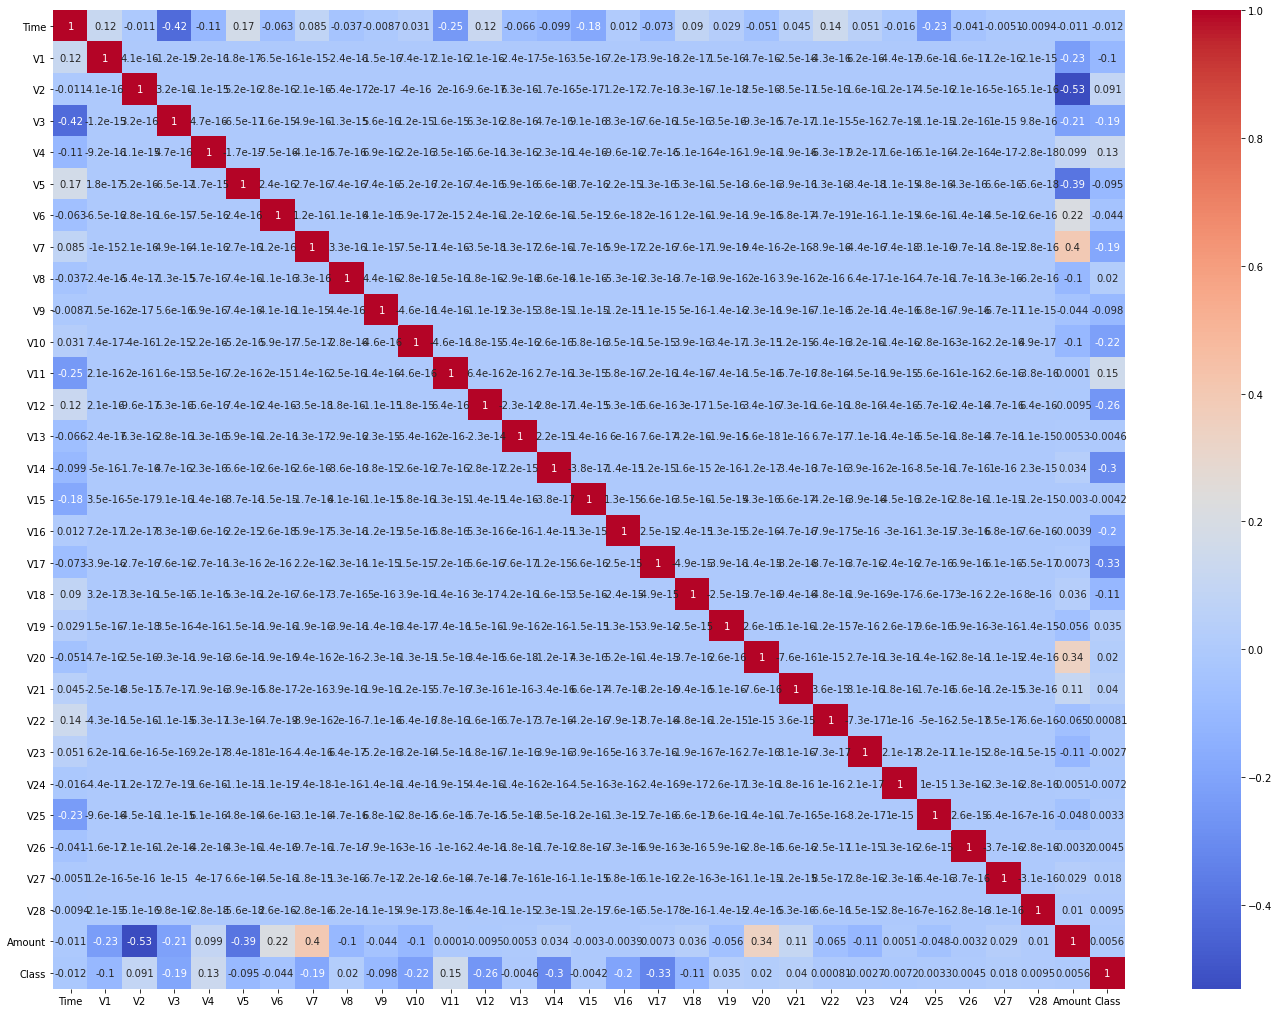

In [11]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

Here we will observe the distribution of our classes

In [12]:
#checking the distrubution pf normal and fraudlent in %
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


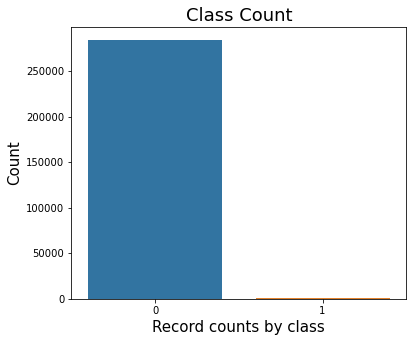

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(6,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [14]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [15]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

# splitting the data into train and test data

In [16]:
#splitting dataset into x and y
y=df['Class']
x=df.drop(['Class'],axis=1)

In [17]:
# checking rows of x
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# checking rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
# splitting the dataset in train_test_split
X_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=0.20)

In [20]:
# checking the the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [21]:
# Accumulating all the column names under one variable
cols = list(x.columns.values)

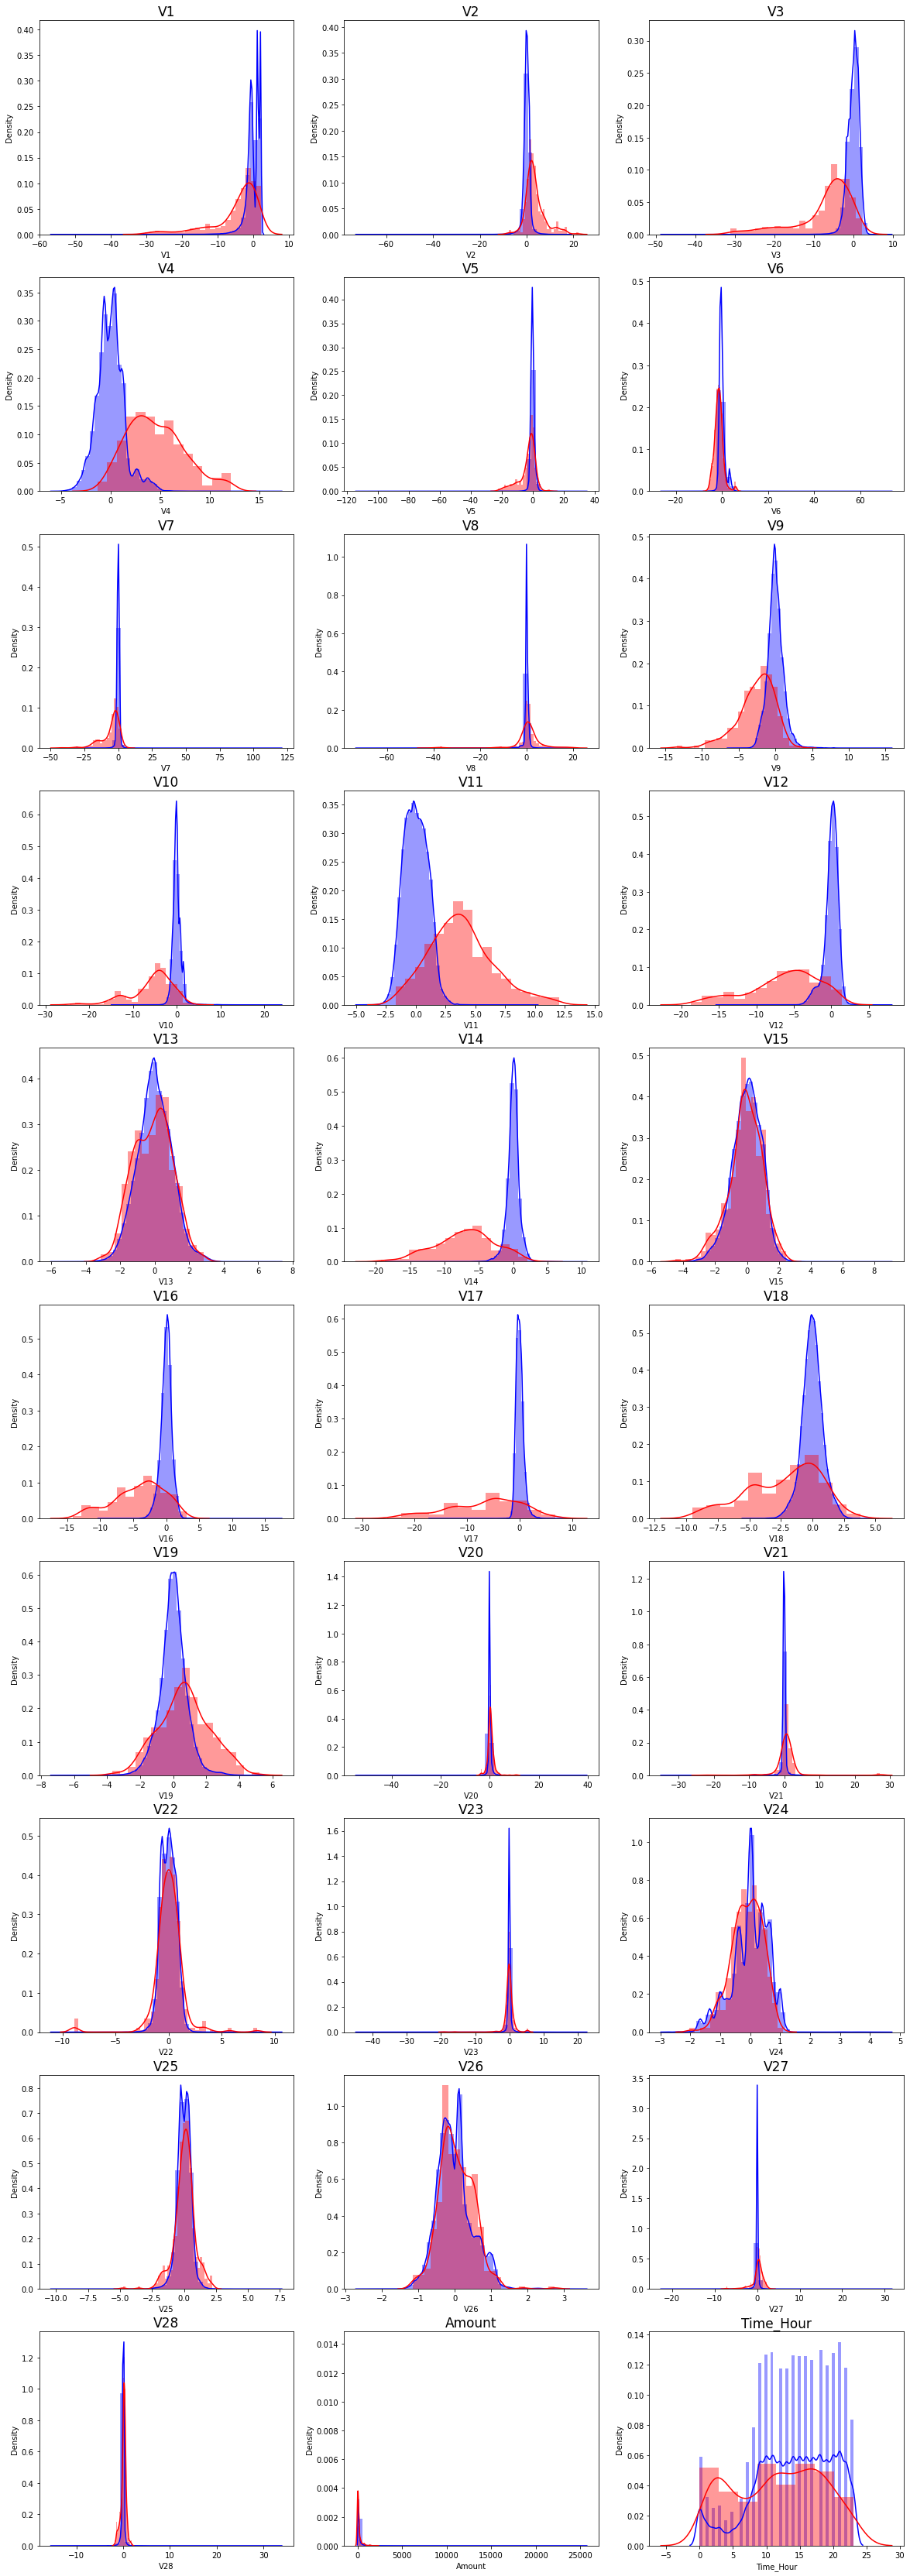

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(x[col][normal_records], color='blue')
  sns.distplot(x[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Model Building

In [27]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [28]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [29]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  


  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

# Perform cross validation with RepeatedKFold

In [30]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None)
# x is the feature set and y is the target
for train_index, test_index in rkf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      7 ... 284789 284797 284799]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6      9     16 ... 284785 284796 284800]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2     10     12 ... 284791 284798 284803]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4     14     49 ... 284793 284802 284805]
TRAIN: [     2      3      4 ... 284802 284803 284805] TEST: [     0      1      8 ... 284801 284804 284806]
TRAIN: [     0      2      3 ... 284803 284804 284806] TEST: [     1      5     24 ... 284798 284799 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     9     16     23 ... 284794 284797 284800]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      6 ... 284791 284792 284801]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     10     11 ... 284790 284796 284802]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9737865597013874
Max auc_roc for l2: 0.9836009767910683
Parameters for l1 regularisations
[[-0.05687179 -0.12837241 -0.18124121  0.06487789 -0.26190937  0.09337036
   0.11624137 -0.03084595 -0.14429232 -0.14329623 -0.03603072  0.0118064
  -0.13543807 -0.21934267  0.01437954 -0.11476503 -0.22054447  0.03058321
   0.01015131  0.2359637   0.08992217 -0.02538695  0.00452242 -0.0144601
  -0.02455204  0.00526133 -0.05659181  0.00562359 -0.00650353 -0.11647747]]
[-2.09740041]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.49831569,
        0.49357014, 0.52039935, 0.85700571, 0.86968108, 0.88282526,
        0.84912968, 0.860583  , 0.89884307, 0.87448324, 0.8778135 ,
        0.89552684, 0.85929637, 0.8983359 , 0.87107719, 0.95039703],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54849444,
        0.53323479, 0.53717893, 0.83690355, 0.91715461, 0.91505319,
        0.88471489, 0.89606874, 0.9275155

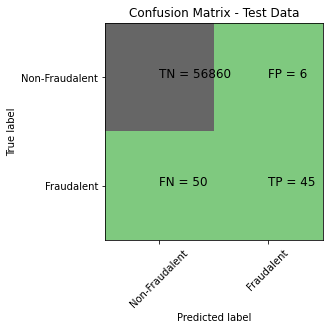

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.47      0.62        95

    accuracy                           1.00     56961
   macro avg       0.94      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9990519829356929
Confusion Matrix


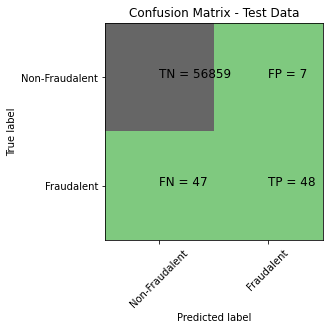

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.51      0.64        95

    accuracy                           1.00     56961
   macro avg       0.94      0.75      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9881831156162132
l2 threshold: 0.0015282612734273042
ROC for the test dataset 98.8%


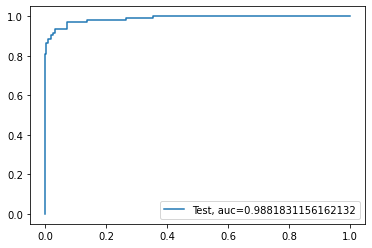

l1 roc_value: 0.8897691155754895
l1 threshold: 0.04521876201552507
ROC for the test dataset 89.0%


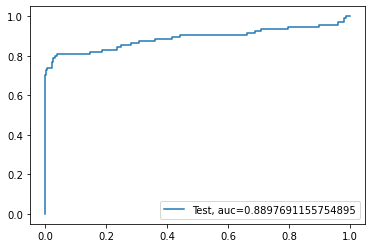

Time Taken by Model: --- 261.76153922080994 seconds ---
------------------------------------------------------------


In [31]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [32]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999017,0.988183,0.001528
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.889769,0.045219


#Results for cross validation with RepeatedKFold:
Looking at Accuracy and ROC value we have "Logistic Regression with L2 Regularisation" which has provided best results for cross validation with RepeatedKFold technique

# Perform cross validation with StratifiedKFold

In [49]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_SKF_cv, x_test_SKF_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.9824919581508855
Parameters for l1 regularisations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.944815

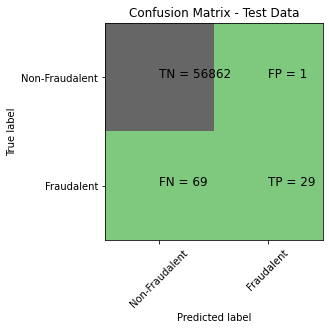

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


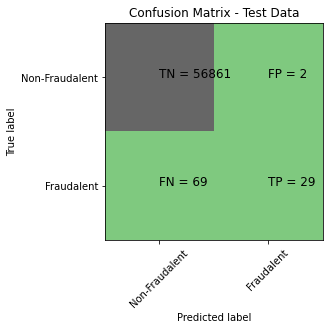

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833805706303765
l2 threshold: 0.0015569782079269217
ROC for the test dataset 98.3%


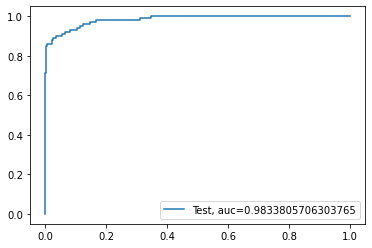

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199856
ROC for the test dataset 88.9%


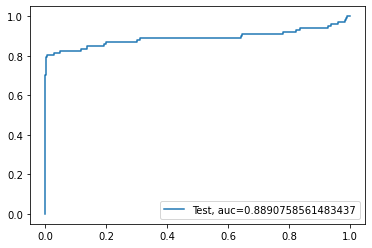

Time Taken by Model: --- 261.35152411460876 seconds ---
------------------------------------------------------------


In [51]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", x_train_SKF_cv,y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [53]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998947,0.985397,0.002305
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998999,0.893766,0.043106
2,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983381,0.001557
3,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


Results for cross validation with StratifiedKFold:
Looking at the ROC value we have Logistic Regression with L2 Regularisation has provided best results for cross validation with StratifiedKFold technique

## Conclusion : 
- As the results show Logistic Regression with L2 Regularisation for StratifiedKFold cross validation provided best results

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [54]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

clf.fit(x_train_SKF_cv, y_train_SKF_cv)
print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_) 
print(clf.scores_) 


#find predicted vallues
y_pred_l2 = clf.predict(x_test)


#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(x_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9824919581508855
Parameters for l2 regularisations
[[ 0.00679675  0.06152691 -0.06704722  0.21844242  0.05406416 -0.03197231
  -0.02280258 -0.11496198 -0.06952483 -0.16361337  0.12785446 -0.19170747
  -0.03707935 -0.36062582  0.00361742 -0.08797851 -0.07285023 -0.00076011
   0.0039344  -0.02800737  0.03818552  0.02333752 -0.01167613 -0.00998215
  -0.00655426  0.00628046 -0.01018091 -0.00171148  0.00039841 -0.0006996 ]]
[-7.41086421]
{1: array([[0.69243733, 0.69420152, 0.71446882, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99128052, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019],
       [0.60699214, 0.60864838, 0.62912773, 0.76882639, 0.90899946,
        0.94879974, 0.9604112 , 0.98187307, 0.98547562, 0.98326917,
        0.97954497, 0.97954497, 0.97954497, 0.97954497, 0.97954497,
        0.97954497, 0.97954497, 0.97954497, 0.97954497, 0.97

In [55]:
# Checking for the coefficient values
clf.coef_

array([[ 0.00679675,  0.06152691, -0.06704722,  0.21844242,  0.05406416,
        -0.03197231, -0.02280258, -0.11496198, -0.06952483, -0.16361337,
         0.12785446, -0.19170747, -0.03707935, -0.36062582,  0.00361742,
        -0.08797851, -0.07285023, -0.00076011,  0.0039344 , -0.02800737,
         0.03818552,  0.02333752, -0.01167613, -0.00998215, -0.00655426,
         0.00628046, -0.01018091, -0.00171148,  0.00039841, -0.0006996 ]])

In [57]:
# Creating a dataframe with the coefficient values
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

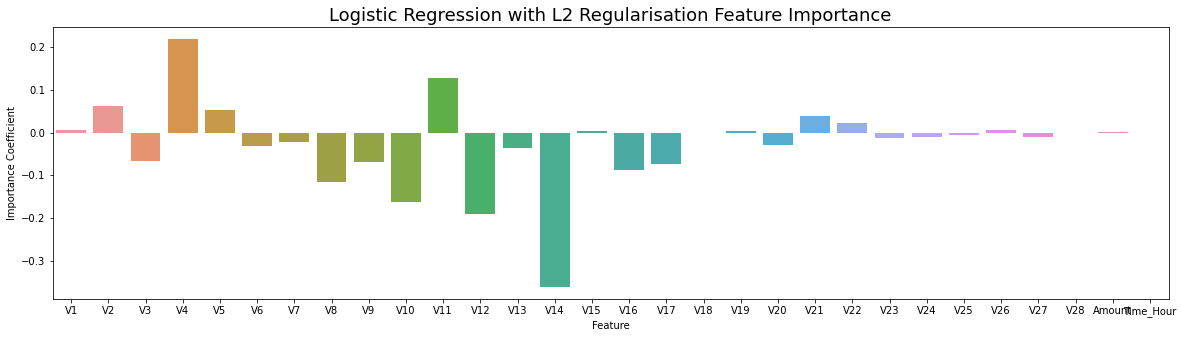

In [58]:
# Plotting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

In [60]:
#Hence it implies that V4, v5,V11 has + ve importance whereas V10, V12, V14 seems to have -ve impact on the predictaions

# Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## <a name="p4-3">Oversampling with RandomOverSampler with StratifiedKFold Cross Validation</a>

- We will use Random Oversampling method to handle the class imbalance

In [33]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index] 
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    x_over, y_over= ROS.fit_resample(x_train, y_train)
  
x_over = pd.DataFrame(data=x_over, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9864540739785935
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

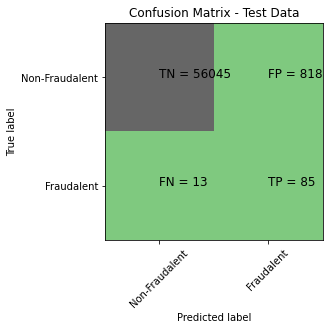

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


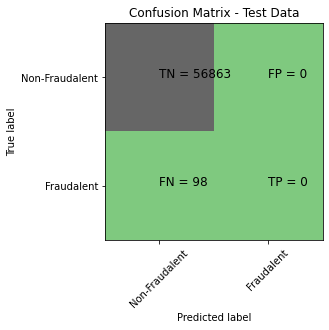

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.980477782798398
l2 threshold: 0.4358932895706264
ROC for the test dataset 98.0%


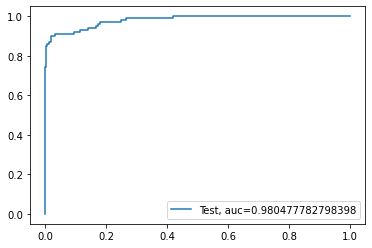

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


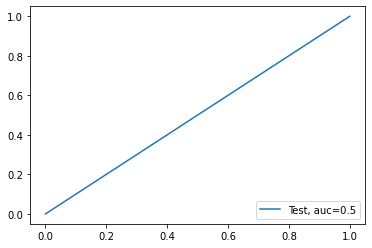

Time Taken by Model: --- 339.2922520637512 seconds ---
------------------------------------------------------------


In [35]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [36]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999017,0.988183,0.001528
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.889769,0.045219
2,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985411,0.980478,0.435893
3,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


### Results for Random Oversampling with StratifiedKFold technique:
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

In [37]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index] 
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    x_train_Smote, y_train_Smote= SMOTE.fit_resample(x_train, y_train)
  
x_train_Smote = pd.DataFrame(data=x_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9930149660543837
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

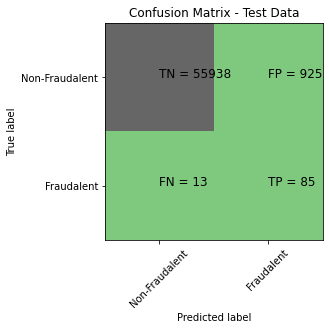

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


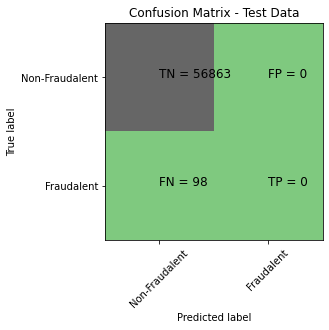

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745855326461345
l2 threshold: 0.3941478300621237
ROC for the test dataset 97.5%


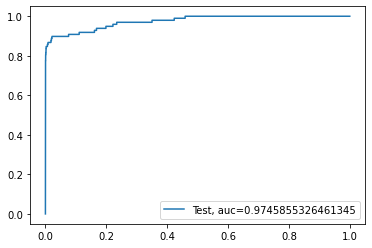

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


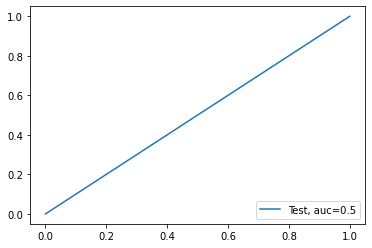

Time Taken by Model: --- 441.14718890190125 seconds ---
--------------------------------------------------------------------------------


In [38]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [39]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999017,0.988183,0.001528
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.889769,0.045219
2,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985411,0.980478,0.435893
3,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000
4,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.983533,0.974586,0.394148
5,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


### Results for SMOTE Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling with StratifiedKFold technique

## <a name="p4-5">Oversampling with ADASYN Oversampling</a>
- We will use ADASYN Oversampling method to handle the class imbalance

In [42]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index] 
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    x_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(x_train, y_train)
  
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.983514022707993
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

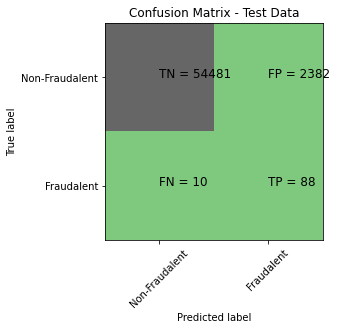

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


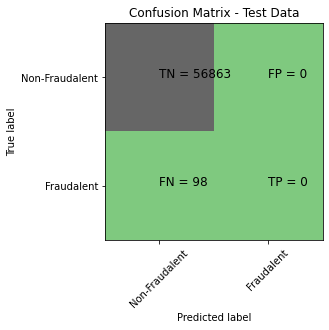

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740295059338826
l2 threshold: 0.611527761523619
ROC for the test dataset 97.4%


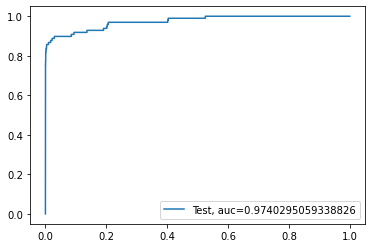

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


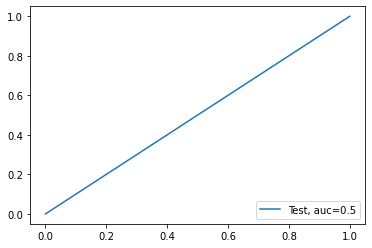

Time Taken by Model: --- 471.43175411224365 seconds ---
--------------------------------------------------------------------------------


In [44]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [45]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999017,0.988183,0.001528
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.889769,0.045219
2,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985411,0.980478,0.435893
3,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000
4,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.983533,0.974586,0.394148
5,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000
6,ADASYN Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.958006,0.974030,0.611528
7,ADASYN Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000


## Results for ADASYN  Oversampling with StratifiedKFold: 
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling with StratifiedKFold technique 

## Overall conclusion after running the models on Oversampled data :
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

## <a name="p5">Hyperparameter Tuning</a>

## HPT - Xgboost Regression

In [47]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':range(60,130,150),
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1,max_delta_step=0,
              missing=None, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, verbosity=1), 
              param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([283.2393291 ,  95.61359324,  79.39022598, 248.76624174,
         212.66314917]),
  'std_fit_time': array([ 5.01228319,  1.42078672,  1.14519072,  3.80184735, 68.78437252]),
  'mean_score_time': array([0.11880898, 0.0844768 , 0.0329381 , 0.03508401, 0.01565523]),
  'std_score_time': array([4.21317957e-02, 6.74297910e-02, 7.96864546e-03, 2.39340388e-02,
         9.89330125e-05]),
  'param_subsample': masked_array(data=[0.9, 0.7, 0.7, 0.7, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[5, 3, 3, 1, 1],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[9, 3, 3, 9, 9],
           

Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be different, the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.


In [48]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(x_over, y_over ) 
XGB_test_score = clf.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGBoostError: [23:50:22] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

### Print the important features of the best model to understand the dataset

In [49]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 17
3rd Top var = 10


In [50]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'XGB_probs' is not defined

## <a name="p6">Conclusion</a>

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices : 

XGboost roc_value: 0.9815403079438694
XGBoost threshold: 0.01721232570707798

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKFold cross validation (without any oversampling or undersampling) gave us the best result.